## Exo 01

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
content_1 = {
    "Company" : ['Djezzy', 'Mobilis'],
    "N customers" : [10000000, 9000000],
    "Rating mean" : [7.4, 4],
    "Year" : [2018, 2019],
}

content_2 = {
    "Company" : ['Ooredoo', 'Mobilis'],
    "N customers" : [11000000, 9000000],
    "Rating mean" : [8, 4],
    "Year" : [2020, 2021],
}

content_3 = {
    "Company" : ['Ooredoo', 'Mobilis', 'Ooredoo'],
    "Expected revenues" : [12000000000, 10800000000, 17000000000],
    "Year" : [2023, 2023, 2024],
}

table_1 = pd.DataFrame(content_1)
table_2 = pd.DataFrame(content_2)
table_3 = pd.DataFrame(content_3)


In [ ]:
df_12 = pd.concat([table_1, table_2], axis=0)

In [ ]:
df_3 = pd.concat([df_12, table_3], axis=0)

In [ ]:
df_3

,Company,N customers,Rating mean,Year,Expected revenues
0,Djezzy,10000000.0,7.4,2018,NaN
1,Mobilis,9000000.0,4.0,2019,NaN
0,Ooredoo,11000000.0,8.0,2020,NaN
1,Mobilis,9000000.0,4.0,2021,NaN
0,Ooredoo,NaN,NaN,2023,1.200000e+10
1,Mobilis,NaN,NaN,2023,1.080000e+10
2,Ooredoo,NaN,NaN,2024,1.700000e+10


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

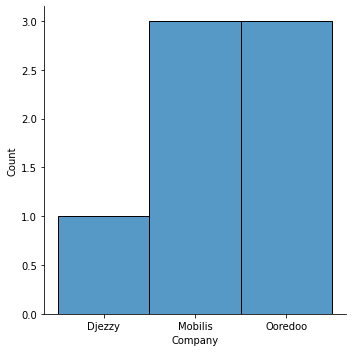

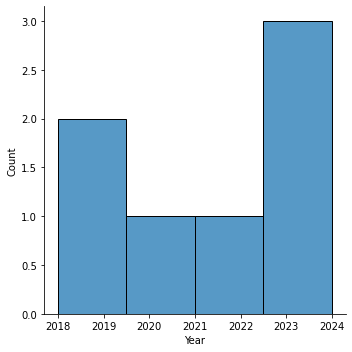

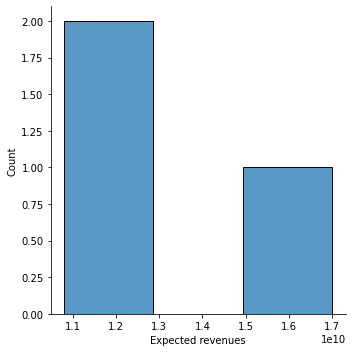

In [ ]:
sns.displot(df_3['Company'])
sns.displot(df_3['Year'])
sns.displot(df_3['Expected revenues'])


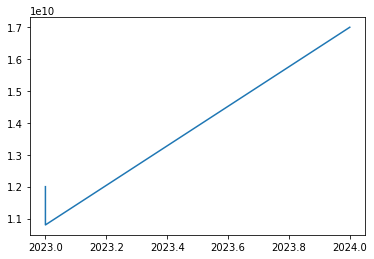

In [ ]:
plt.plot(df_3['Year'], df_3['Expected revenues'])

In [ ]:
a = (df_3.iloc[6, 4]-df_3.iloc[5, 4])/(df_3.iloc[6, 3]-df_3.iloc[5, 3])
b = -12530600000000

exp_rev_2025 = a*2025+b
exp_rev_2025

24400000000.0

## Exo 02 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:

import io
data = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))
data.head()
X_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data[X_cols] = scaler.fit_transform(data[X_cols])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
data['species']= enc.fit_transform(data.species)

* The sepal length is correlated with petal length
* The sepal length is correlated with petal width
* The petal length is highly correlated with petal width. If we delete one of them, it might not have big influence on the ML model.




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = data[X_cols]
X = pca.fit_transform(X)
y = data['species']

In [ ]:
data_pca = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})

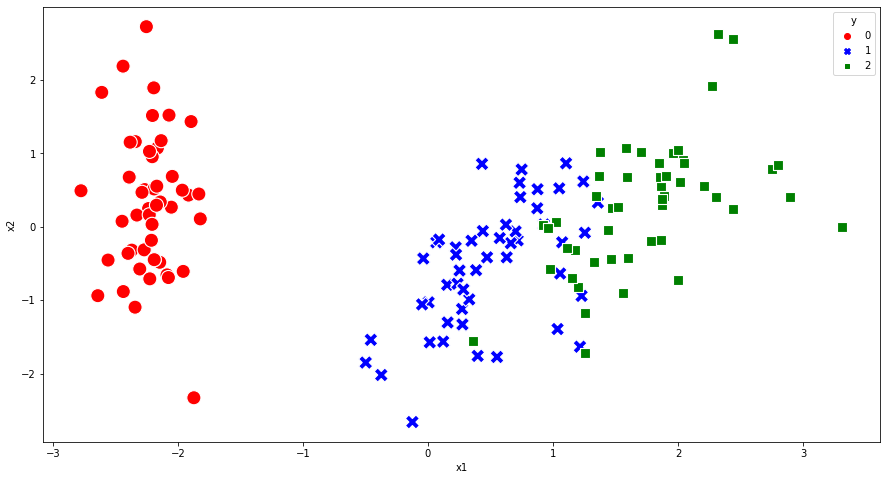

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data_pca, x='x1', y='x2', hue='y', style='y', s=200, palette=['red', 'blue', 'green'])

### The correlation of eachtwo variables

In [ ]:
data_pca.corr()

,x1,x2,y
x1,1.000000e+00,1.110626e-16,0.944763
x2,1.110626e-16,1.000000e+00,-0.014869
y,9.447635e-01,-1.486929e-02,1.000000


After applying PCA, the columns are no longer correlated which is due to projection of no correlated features on the same axis.

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=45, shuffle=True)

i = 0

for train_index, test_index in kf.split(X):
  X_train, X_test = data.loc[train_index, X_cols], data.loc[test_index, X_cols]
  y_train, y_test = y[train_index], y[test_index]
  print(f'----------------------{i}------------------')
  print(f'{X_train.var(), X_test.var()}')

  i += 1

----------------------0------------------
(sepal_length    0.956194
sepal_width     1.054045
petal_length    0.964506
petal_width     0.984789
dtype: float64, sepal_length    1.562128
sepal_width     0.607890
petal_length    1.480207
petal_width     1.277784
dtype: float64)
----------------------1------------------
(sepal_length    1.062895
sepal_width     1.038078
petal_length    1.033992
petal_width     1.016900
dtype: float64, sepal_length    0.540844
sepal_width     0.771592
petal_length    0.817420
petal_width     0.965169
dtype: float64)
----------------------2------------------
(sepal_length    1.016464
sepal_width     0.994595
petal_length    1.018090
petal_width     1.028131
dtype: float64, sepal_length    0.898098
sepal_width     1.138263
petal_length    0.893366
petal_width     0.742932
dtype: float64)
----------------------3------------------
(sepal_length    0.994809
sepal_width     0.986869
petal_length    0.984688
petal_width     0.982123
dtype: float64, sepal_length    

## Exo 05

In [ ]:
content_exo5 = {
    "outlook" : ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    "temperature" : ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    "humidity" : ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    "windy" : [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "play" : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

data_exo5 = pd.DataFrame(content_exo5)
data_exo5.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, Binarizer

ordinal = OrdinalEncoder()
one_hot = OneHotEncoder()
binary = Binarizer()

temp_ord = ordinal.fit_transform(data_exo5[['temperature']])
temp_one_hot = one_hot.fit_transform(data_exo5[['temperature']])
temp_one_hot = pd.DataFrame.sparse.from_spmatrix(temp_one_hot).astype('int8')

temp_freq = data_exo5[['temperature']]
for val in np.unique(temp_freq.values):
  temp_freq[temp_freq['temperature'] == val] = len(temp_freq[temp_freq['temperature'] == val])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
temp_ord

array([[1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [ ]:
temp_one_hot

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,0,0,1


In [ ]:
temp_freq

,temperature
0,4
1,4
2,4
3,6
4,4
5,4
6,4
7,6
8,4
9,6


## Exo 03

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/My 2CS/S1/FDS/TPs/TP2/train.csv")


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760



### Check that not all numerical values include a string.




In [ ]:
df['Ship Mode'].str.isnumeric()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Name: Ship Mode, Length: 9800, dtype: bool

### Check that dates are correct.

In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


> We see that the  type of "Order Date" and "Ship Date" is object. Let’s parse this to datetime:



In [ ]:
from datetime import datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")
df['Order Date'] = pd.to_datetime(df['Order Date'])



In [ ]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

### Check that the request id field respects the specific forma: “US or CA-YYYY-NUMBER”.

In [ ]:
import re

A function that returns the strings where the pattern is matched.

The pattern is input as a regular expression.

In [ ]:

def grep(reg_exp, my_text):
    result = []
    reg_exp_compiled = re.compile(reg_exp)
    for i in range(len(my_text)):
        if reg_exp_compiled.search(my_text[i]):
            result.append(my_text[i])
    return result

In [ ]:
c= grep('^CA|^US' +'-'+ '\d\d\d\d'+'-'+'\d\d\d\d\d\d', df['Order ID'])

Percentage of the sentence “US or CA-YYYY-NUMBER”.


In [ ]:
100 * len(c)/len(df['Order ID'])

100.0

We found that the Percentage of the sentence “US or CA-YYYY-NUMBER” in the column "Order ID" so the request id field respects the specific forma: “US or CA-YYYY-NUMBER”

## Exo 04

In [ ]:
from scipy import interpolate

data_sc = pd.read_csv('/content/drive/MyDrive/My 2CS/S1/FDS/TPs/TP2/train.csv')
data_sc.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


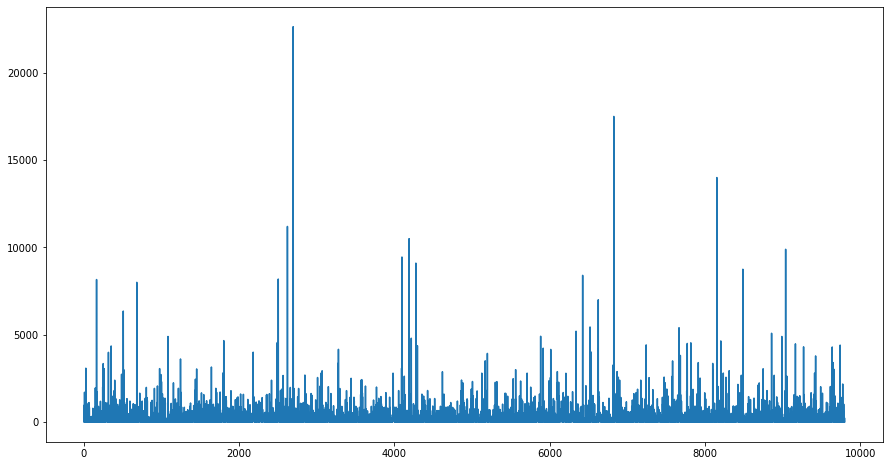

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data_sc['Row ID'], data_sc['Sales'])

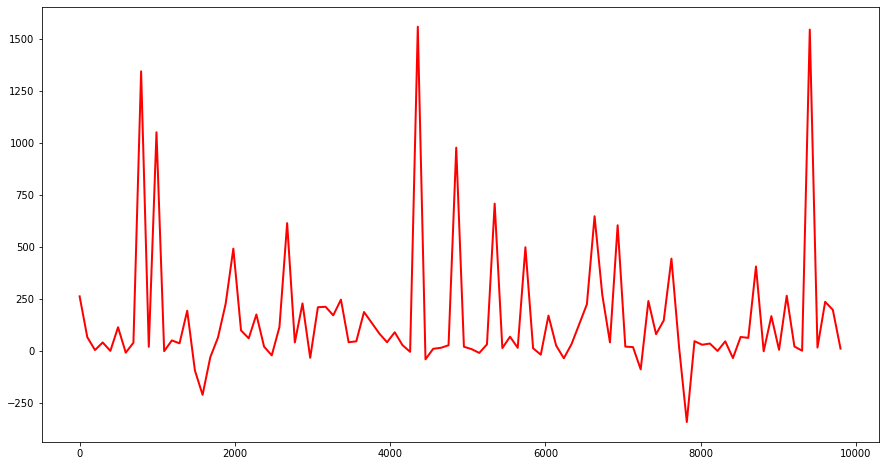

In [ ]:
spline = interpolate.UnivariateSpline(data_sc['Row ID'], data_sc['Sales'])
plt.figure(figsize=(15, 8))
xs_ = np.linspace(1, 9800, 100)
# spline.set_smoothing_factor(1)
plt.plot(xs_, spline(xs_), 'r', lw=2)

# EXO 07

In [ ]:
content_exo7= {
    "" : [1,2,3],
    "Age (days)" : [25,25,30],
    "Weight (grams)" : [120,120,80],
    "Tall (cm)" : [8,8,7.5],
    "Class" : ['Obese', 'Obese', 'Not Obese']
}

data_exo7 = pd.DataFrame(content_exo7)
data_exo7.head()

,,Age (days),Weight (grams),Tall (cm),Class
0,1,25,120,8.0,Obese
1,2,25,120,8.0,Obese
2,3,30,80,7.5,Not Obese


### Which problem it contains this data?



> We notice that we have categorical data which are represented by words in the column "Class"





### Create a python function to handle it.

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df



In [ ]:
handle_non_numerical_data(data_exo7)

,,Age (days),Weight (grams),Tall (cm),Class
0,1,25,120,8.0,0
1,2,25,120,8.0,0
2,3,30,80,7.5,1


In [ ]:
data_exo7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   3 non-null      int64  
 1   Age (days)      3 non-null      int64  
 2   Weight (grams)  3 non-null      int64  
 3   Tall (cm)       3 non-null      float64
 4   Class           3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 248.0 bytes
